#Red neuronal para predecir precio de una casa



Importar librerias

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

Cargar base de datos

In [ ]:
#cargar base de datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/07_DeepLearning/files'

In [ ]:
#leer la data
train=pd.read_csv(path+"/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test=pd.read_csv(path+"/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
#limpiar la data
train.isna().sum()
print('Tamaño del tensor de data de entrenamiento:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Tamaño del tensor de data de entrenamiento númerico:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

Tamaño del tensor de data de entrenamiento: (1460, 81)

Tamaño del tensor de data de entrenamiento númerico: (1460, 38)


In [ ]:
test.isna().sum()
print('Tamaño del tensor de data de prueba:', test.shape)
test = test.select_dtypes(exclude=['object'])
print("")
print('Tamaño del tensor de data de prueba númerico:', test.shape)
test.drop('Id',axis = 1, inplace = True)
test.fillna(0,inplace=True)

Tamaño del tensor de data de prueba: (1459, 80)

Tamaño del tensor de data de prueba númerico: (1459, 37)


In [ ]:
#preproces
#se escala la data para mejor procesamiento de la red

y_train = np.array(train['SalePrice']).reshape(-1, 1)
X_train = train
X_train.drop('SalePrice', axis=1, inplace=True)

scaled_y_train = MinMaxScaler()
scaled_y_train.fit(y_train)
y_train_scaled = scaled_y_train.transform(y_train)

scaled_data_train = MinMaxScaler()
scaled_data_train.fit(X_train)
X_train_scaled = scaled_data_train.transform(X_train)


In [ ]:
X_train_scaled

array([[0.23529412, 0.20766773, 0.0334198 , ..., 0.        , 0.09090909,
        0.5       ],
       [0.        , 0.25559105, 0.03879502, ..., 0.        , 0.36363636,
        0.25      ],
       [0.23529412, 0.2172524 , 0.04650728, ..., 0.        , 0.72727273,
        0.5       ],
       ...,
       [0.29411765, 0.21086262, 0.03618687, ..., 0.16129032, 0.36363636,
        1.        ],
       [0.        , 0.2172524 , 0.03934189, ..., 0.        , 0.27272727,
        1.        ],
       [0.        , 0.23961661, 0.04037019, ..., 0.        , 0.45454545,
        0.5       ]])

In [ ]:
X_test = test
#X_test.drop('SalePrice', axis=1, inplace=True)

scaled_data_test = MinMaxScaler()
scaled_data_test.fit(X_test)
X_test_scaled = scaled_data_test.fit_transform(X_test)

In [ ]:
X_test_scaled

array([[0.        , 0.4       , 0.18414656, ..., 0.        , 0.45454545,
        1.        ],
       [0.        , 0.405     , 0.23212407, ..., 0.73529412, 0.45454545,
        1.        ],
       [0.23529412, 0.37      , 0.22419735, ..., 0.        , 0.18181818,
        1.        ],
       ...,
       [0.        , 0.8       , 0.33611464, ..., 0.        , 0.72727273,
        0.        ],
       [0.38235294, 0.31      , 0.16272447, ..., 0.04117647, 0.54545455,
        0.        ],
       [0.23529412, 0.37      , 0.14795937, ..., 0.        , 0.90909091,
        0.        ]])

Ajustar red neuronal

In [ ]:
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model

In [ ]:
# compilamos el modelo
opt = Adam(learning_rate=0.001)

model.compile(loss='mean_absolute_error', optimizer=opt, metrics = ['accuracy', 'mae', 'mse'])

# obtenemos los resultados del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               7400      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 2

In [ ]:
history = model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=16, epochs=100,
             verbose=1, shuffle=True)

Epoch 1/100
92/92 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 6.8493e-04 - mae: 0.0781 - mse: 0.0131
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.0014 - mae: 0.0425 - mse: 0.0043
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.0014 - mae: 0.0405 - mse: 0.0037
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.0014 - mae: 0.0362 - mse: 0.0034
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.0014 - mae: 0.0323 - mse: 0.0035
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.0014 - mae: 0.0307 - mse: 0.0025
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.0014 - mae: 0.0304 - mse: 0.0027
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.0014 - mae: 0

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.sample(5)

,loss,accuracy,mae,mse,epoch
37,0.022733,0.00137,0.022733,0.002217,37
26,0.025328,0.00137,0.025328,0.002202,26
78,0.018561,0.00137,0.018561,0.000941,78
91,0.018778,0.00137,0.018778,0.000897,91
49,0.020518,0.00137,0.020518,0.001242,49


In [ ]:
#predecir data en función del modelo
#y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X_train_scaled)
y_pred

array([[0.24124679],
       [0.20253076],
       [0.25370193],
       ...,
       [0.31170398],
       [0.16016115],
       [0.14050132]], dtype=float32)

In [ ]:
#scaled_y_train
#scaled_data_train
#scaled_data_test

y_pred_real = scaled_y_train.inverse_transform(y_pred)
y_pred_real

array([[208621.81],
       [180742.4 ],
       [217590.75],
       ...,
       [259358.03],
       [150232.05],
       [136075.  ]], dtype=float32)

In [ ]:
y_pred_real.shape

(1460, 1)

In [ ]:
y_train_scaled.shape

(1460, 1)

Text(0, 0.5, 'Precio Real')

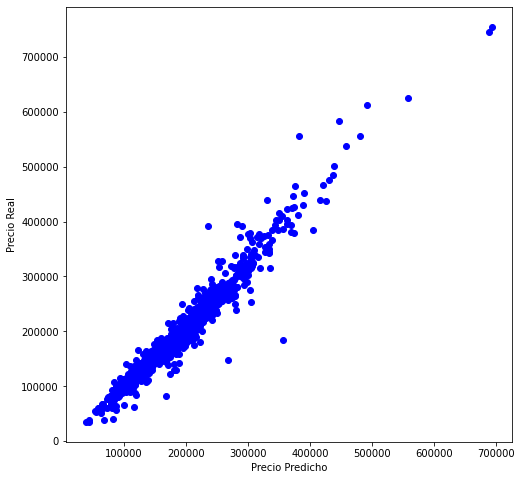

In [ ]:
#plotear predicción vs real

plt.figure(figsize=(8,8))
plt.plot(y_pred_real, y_train, 'bo')
plt.xlabel('Precio Predicho')
plt.ylabel('Precio Real')

Text(0, 0.5, 'MSE')

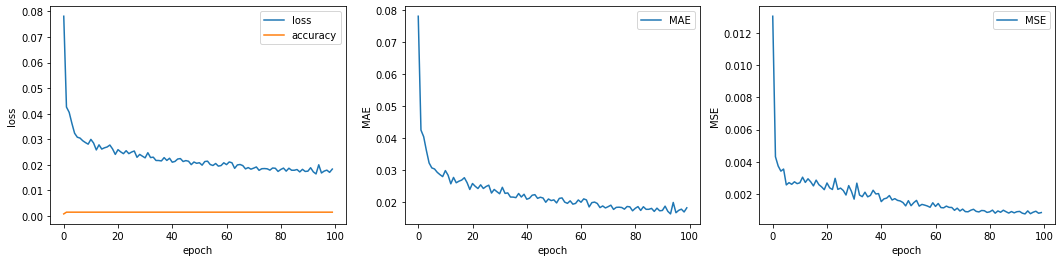

In [ ]:
#plotear loss vs epoch, y las otras metricas

fig, ax = plt.subplots(1,3, figsize=(18,4))

ax[0].plot(hist['epoch'], hist['loss'], label='loss')
ax[0].plot(hist['epoch'], hist['accuracy'], label='accuracy')
ax[0].legend()
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[1].plot(hist['epoch'], hist['mae'], label='MAE')
ax[1].legend()
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('MAE')
ax[2].plot(hist['epoch'], hist['mse'], label='MSE')
ax[2].legend()
ax[2].set_xlabel('epoch')
ax[2].set_ylabel('MSE')


# Clasificador de imágenes

## Planteamiento del problema

Al instalar trampas cámara para el estudio de grandes felinos, como por ejemplo pumas, estas obtienen imágenes de muchas otras cosas (perros, ratones, zorros, vacas, cabras, personas, etc.), ya que se accionan con movimiento. Por esta razon,  que resulta necesario clasificar las imágenes para determinar cual pertenece a la especie de nuestro estudio y cual no.
Debido a que no poseemos las imágenes necesarias, en el siguiente caso, entrenaremos una red neuronal para que pueda determinar si las imagenes corresponden a un perro o a un gato. Este tipo de clasificación es muy útil y simple de realizar.

Importamos las bibliotecas necesarias

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Conectamos drive pues es aqui donde estan los datos de entrenamiento y de prueba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Asignamos los directorios donde se encuentran las imagenes de prueba y de entrenamiento

In [ ]:
train_path = '/content/drive/MyDrive/Deep Learning/training_set/training_set'
test_path = '/content/drive/MyDrive/Deep Learning/test_set/test_set'

Aqui creamos los tensores de prueba y de entrenamiento, definimos el target_size que convertirá las imagenes en el tamaño deseado, el cual determinará el tamaño que le demos al input de la red neuronal cuando la creemos. Definimos las clases en este caso gatos y perros y tambien el tamaño de cada batch (10). La variable shuffle=False se le agrega solo a los conjuntos de prueba ya que se necesitaran los labels en orden para la matriz de consuión mas adelante.

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)

Found 8014 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Llamamos un conjunto de imagenes junto a su label

In [ ]:
imgs, labels = next(train_batches)

Definimos la funcion para plotear las imagenes

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Luego ploteamos un conjunto de imagenes junto a sus labels ( [0.1.] para perros, [1.0.] para gatos )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

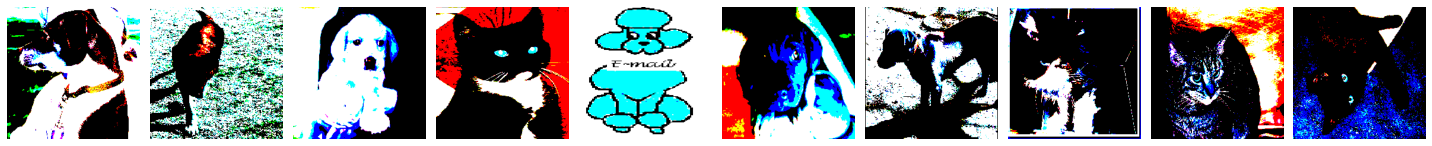

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

Este es el primer set de 10 imagenes de entrenamiento. Los colores se ven distorsionados porque se le agrego un preprocesamiento para simplificar la imagen y sea mas facilmente procesada en la red neuronal.

Ahora construimos la red neuronal.

La primera capa en el modelo es una capa convolucional de 2 dimensiones, de la cual saldran 32 filtros de outputs cada uno con un tamaño de kernel de 3x3, se usa la funcion de activación Relu y el padding se define como "same" para que se agreguen 0 en los bordes de la imagen y el output tenga el mismo tamaño del input.

En la primera capa se especifica la forma de las imagenes (input_shape). Estas tienen 224 pixeles de ancho y alto y 3 canales de colores (RGB) por lo que el input_shape corresponde a (224,224,3).

A continuación, se le agrega una capa de maxpool, la cual reduce la dimensionalidad de las imagenes.

Luego se le agrega una nueva capa convolucional de 2 dimensiones, solo que esta vez contiene 64 filtros. Esta capa es acompañada por otra capa de maxpool.

Finalmente, se "aplana" (Flatten) el output de las capas convolucionales y se le pasa una capa de densidad (Dense). La capa densa es la salida de la red neuronal y tiene 2 nodos (gato y perro). Se utiliza la funcion de activación softmax en el output para que cada imagen tenga una distribucion de probabilidad tanto para el label "perro" como "gato".

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

A continuación podemos observar un resumen del modelo. Se observan las distintas capas, las formas de los objetos de salida y el numero de parametros.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

A continuación, utilizamos el optimizador Adam con un learning rate de 0.0001, la perdida como "categorical_crossentropy" (la cual es binaria [perros y gatos]) y reportamos la precisión para ver que tan efectivo es el modelo.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Ahora podemos entrenar el modelo. Para esto usamos el batch de entrenamiento que creamos anteriormente, definimos el tiempo de entrenamiento y dejamos verbose con un valor de 2 para que no entregue cierta información sobre cada epoca de entrenamiento.

In [ ]:
model.fit(x=train_batches, epochs=5, verbose=2)

Epoch 1/5
802/802 - 2108s - loss: 3.0882 - accuracy: 0.6339 - 2108s/epoch - 3s/step
Epoch 2/5
802/802 - 539s - loss: 0.3130 - accuracy: 0.8711 - 539s/epoch - 672ms/step
Epoch 3/5
802/802 - 535s - loss: 0.0991 - accuracy: 0.9704 - 535s/epoch - 667ms/step
Epoch 4/5
802/802 - 536s - loss: 0.0337 - accuracy: 0.9935 - 536s/epoch - 668ms/step
Epoch 5/5
802/802 - 541s - loss: 0.0416 - accuracy: 0.9883 - 541s/epoch - 675ms/step


Se observa que el modelo se entrena con bastante precision y muy poca perdida, lo que indica que se esta overfiteando los datos de entrenamiento.

A continuación seleccionamos las imagenes del conjunto de prueba "test_batches" para testear nuestro recientemente entrenado modelo.

In [ ]:
test_imgs, test_labels = next(test_batches)

Ploteamos las imagenes de prueba, junto con los labels. En este caso son solo gatos debido a que este conjunto no estaba aleatorizado como el de entrenamiento, entonces la primera mitad de datos corresponde solo a gatos y la segunda mitad solo a perros.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

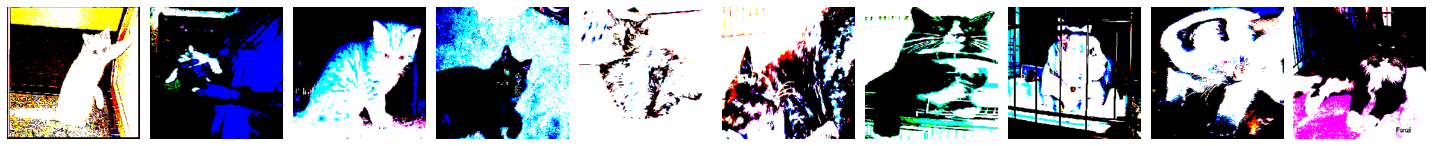

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
plotImages(test_imgs)
print(test_labels)

Ahora utilizaremos el modelo entrenado previamente para predecir (model.predict()) a que corresponden las imagenes de prueba, sleccionamos verbose = 0 para nover ningun output de este proceso.

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

Vemos la salida de las predicciones y como mencionamos anteriormente, estas son las probabilidades de que pertenezca a un grupo o al otro.

In [ ]:
predictions

array([[9.6809030e-01, 3.1909727e-02],
       [9.9972755e-01, 2.7246930e-04],
       [9.6363449e-01, 3.6365449e-02],
       ...,
       [9.9193794e-01, 8.0620991e-03],
       [4.7015658e-01, 5.2984339e-01],
       [1.2525883e-01, 8.7474120e-01]], dtype=float32)

Redondeamos los valores para asignarles solo una de las 2 categorias y vemos los resultados de esto.

In [ ]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Para visualizar de mejor manera los resultados, podemos plotear una matriz de confusion, como ya lo hemos hecho en los modulos anteriores.

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
cm

array([[708, 303],
       [324, 688]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Revisamos los indices para saber cual corresponde a gatos y cual correpsonde a perros

In [ ]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

Confusion matrix, without normalization
[[708 303]
 [324 688]]


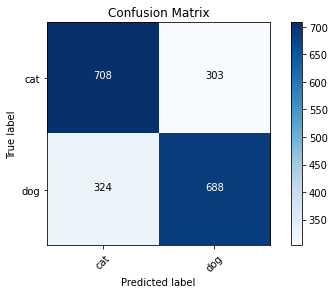

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Podemos ver que el modelo determinó correctamente las imágenes de gatos cuando eran efectivamente gatos 708 veces, mientras que erró en la clasificación 324. Por su parte el modelo le acertó a los perritos 688 mientras que los confundió con gatos 303 veces.

Si bien este modelo no es perfecto y se pueden hacer algunos arreglos para que mejore, determina de manera simple y con bastante precisión si las imagenes testeadas son perros o gatos. esto podria ser de mucha utilidad para por lo menos bajar la cantidad de datos con los que se tenga que realizar una clasificación manual.

# Predicción de retorno de una acción

# Descripción del Problema

A través del uso de redes neuronales recurrentes, en particular de redes LSTM, se busca realizar la predicción del precio de una acción. Las redes LSTM son apmpliamente utilizadas en la predicción de series de tiempo, entre otras razones, debido a que en lugar de neuronasa, tiene bloques de memoria que permiten ajustar ***cuánto recordar*** de la historia más lejana, así como de la historia más reciente. A continuación, se trabaja con un data set de precios de 8 acciones y un índice de mercado, con historia desde 2012-01-12 hasta 2020-08-11.

In [ ]:
# Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos las librerías
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# Lectura de datos (precios de la acción)
stock_price_df = pd.read_csv('/content/drive/MyDrive/Cursos/Python for Financial Analysis/Part 3. AI and ML in Finance/stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Lectura de datos (volumen transado)
stock_vol_df = pd.read_csv('/content/drive/MyDrive/Cursos/Python for Financial Analysis/Part 3. AI and ML in Finance/stock_volume.csv')
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [ ]:
# Ordenamos según fecha
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [ ]:
# revisamos missing values
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


# EDA

Creamos dos funciones, una para normalizar los datos y otra para graficarlos como gráfico de líneas con plotly.

In [ ]:
# función para normalizar los datos basada en el precio inicial
def normalize(df):
  x = df.copy()
  for i in df.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
# función para graficar las series de tiempo usando Plotly Express
def interactive_plots(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
interactive_plots(stock_price_df, 'Stock Prices')

In [ ]:
interactive_plots(normalize(stock_price_df), 'Normalized Stock Prices')

In [ ]:
interactive_plots(stock_vol_df, 'Stock Volume Traded')

In [ ]:
interactive_plots(normalize(stock_vol_df), 'Normalized Stock Volume Traded')

In [ ]:
# función para concatenar precios y volumen en un solo df
def individual_stock(price_df, vol_df, name):
  return pd.DataFrame({'Date': price_df['Date'],
                       'Close': price_df[name],
                       'Volume': vol_df[name]})

In [ ]:
# función para obtener el target del modelo (data futura)
def trading_window(data, n):
  data['Target'] = data[['Close']].shift(-n)
  return data

In [ ]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [ ]:
price_volume_target_df = trading_window(price_volume_df, 1)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [ ]:
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date'])) # para escalar los datos entre cero y uno
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [ ]:
price_volume_target_scaled_df.shape

(2158, 3)

In [ ]:
X = price_volume_target_scaled_df[:, :2]
y = price_volume_target_scaled_df[:, 2:]

In [ ]:
X

array([[0.01102638, 0.11442624],
       [0.01046185, 0.12362365],
       [0.01220906, 0.13517696],
       ...,
       [1.        , 0.10747163],
       [0.97208751, 0.10431171],
       [0.98824476, 0.11430054]])

In [ ]:
y

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

In [ ]:
X.shape

(2158, 2)

In [ ]:
y.shape

(2158, 1)

In [ ]:
split = int(0.65*len(X))
split

1402

In [ ]:
X_train = X[:split]
X_train.shape

(1402, 2)

In [ ]:
y_train = y[:split]
y.shape

(2158, 1)

In [ ]:
X_test = X[split:]
X_test.shape

(756, 2)

In [ ]:
y_test = y[split:]
y_test.shape

(756, 1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


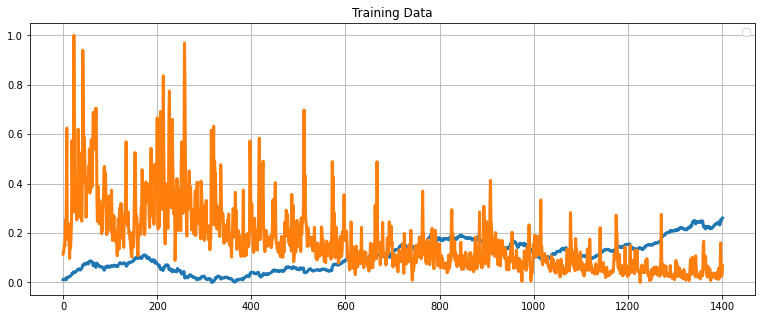

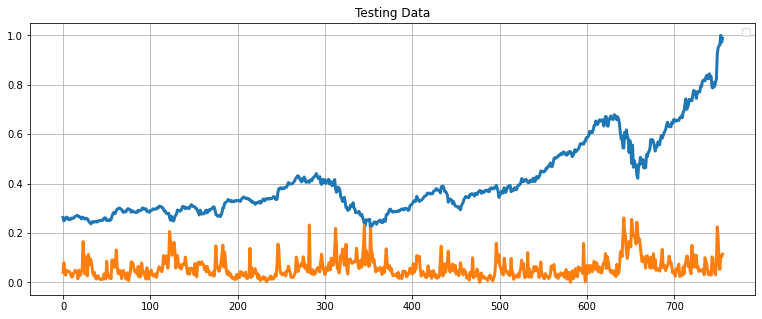

In [ ]:
# función para graficar con matplotlib
def show_plot(data, title):
  plt.figure(figsize=(13,5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()
  plt.legend()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

# Generamos un modelo con una Ridge Regression para compararlo luego con el modelo LSTM

In [ ]:
from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
lc_accuracy = regression_model.score(X_test, y_test) 
print('Ridge regression score is: {}'.format(lc_accuracy))

Ridge regression score is: 0.7950028030821767


In [ ]:
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.03466412],
       [0.03374627],
       [0.03451936],
       ...,
       [0.81048342],
       [0.78876033],
       [0.80091324]])

In [ ]:
predicted = []
for i in predicted_prices:
  predicted.append(i[0])
len(predicted)

2158

In [ ]:
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [ ]:
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [ ]:
df_predicted['close'] = close
df_predicted

,Date,close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [ ]:
df_predicted['prediction'] = predicted
df_predicted

,Date,close,prediction
0,2012-01-12,0.011026,0.034664
1,2012-01-13,0.010462,0.033746
2,2012-01-17,0.012209,0.034519
3,2012-01-18,0.013785,0.034556
4,2012-01-19,0.013299,0.034707
...,...,...,...
2153,2020-08-04,0.957606,0.778280
2154,2020-08-05,0.961583,0.783205
2155,2020-08-06,1.000000,0.810483
2156,2020-08-07,0.972088,0.788760


In [ ]:
interactive_plots(df_predicted, 'Original vs Predictions')

In [ ]:
# hacemos el ejercicio con AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [ ]:
training_data =  price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_data_scaled = sc.fit_transform(training_data)
training_data_scaled

array([[0.00828228, 0.35544202],
       [0.00524163, 0.31342927],
       [0.00741423, 0.35423623],
       ...,
       [0.98345918, 0.36634157],
       [0.9878185 , 0.3937553 ],
       [0.97511517, 0.49240931]])

In [ ]:
X = []
y = []
for i in range(1, len(price_volume_df)):
  X.append(training_data_scaled[i-1:i, 0])
  y.append(training_data_scaled[i, 0])

In [ ]:
X

[array([0.00828228]),
 array([0.00524163]),
 array([0.00741423]),
 array([0.01423076]),
 array([0.0172951]),
 array([0.01771253]),
 array([0.01800663]),
 array([0.01736626]),
 array([0.02277871]),
 array([0.01915935]),
 array([0.01816315]),
 array([0.01658831]),
 array([0.0163037]),
 array([0.02184418]),
 array([0.02253203]),
 array([0.03171561]),
 array([0.03144519]),
 array([0.03273549]),
 array([0.03411583]),
 array([0.0350598]),
 array([0.03064355]),
 array([0.03497445]),
 array([0.034372]),
 array([0.03092341]),
 array([0.03794869]),
 array([0.03946186]),
 array([0.03992672]),
 array([0.03776843]),
 array([0.04051967]),
 array([0.04160122]),
 array([0.04247878]),
 array([0.04465612]),
 array([0.04157279]),
 array([0.04556211]),
 array([0.04344649]),
 array([0.04093236]),
 array([0.03098508]),
 array([0.03538239]),
 array([0.04168189]),
 array([0.04403469]),
 array([0.04413903]),
 array([0.05593158]),
 array([0.05513944]),
 array([0.05908607]),
 array([0.05983085]),
 array([0.06247

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
split = int(0.7*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape = (X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences=True) (inputs)
x = keras.layers.LSTM(150, return_sequences=True) (x)
x = keras.layers.LSTM(150, return_sequences=True) (x)
output = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs = inputs, outputs = output)
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 lstm_2 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dense (Dense)               (None, 1, 1)              151       
                                                                 
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
38/38 [==============================] - 8s 51ms/step - loss: 0.0357 - val_loss: 0.0898
Epoch 2/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0176 - val_loss: 0.0692
Epoch 3/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0173 - val_loss: 0.0833
Epoch 4/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0173 - val_loss: 0.0806
Epoch 5/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0174 - val_loss: 0.0829
Epoch 6/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0804
Epoch 7/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0173 - val_loss: 0.0777
Epoch 8/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0178 - val_loss: 0.0831
Epoch 9/20
38/38 [==============================] - 0s 13ms/step - loss: 0.0173 - val_loss: 0.0951
Epoch 10/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0172 - val_loss: 0.0795
Epoch 11/

In [ ]:
predictions = model.predict(X)

In [ ]:
test_predicted = []
for i in predictions:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[array([0.2594198], dtype=float32),
 array([0.259329], dtype=float32),
 array([0.2593939], dtype=float32),
 array([0.25959742], dtype=float32),
 array([0.25968888], dtype=float32),
 array([0.2597013], dtype=float32),
 array([0.25971007], dtype=float32),
 array([0.25969103], dtype=float32),
 array([0.25985247], dtype=float32),
 array([0.25974452], dtype=float32),
 array([0.25971475], dtype=float32),
 array([0.25966778], dtype=float32),
 array([0.2596593], dtype=float32),
 array([0.25982463], dtype=float32),
 array([0.2598451], dtype=float32),
 array([0.26011896], dtype=float32),
 array([0.26011088], dtype=float32),
 array([0.26014936], dtype=float32),
 array([0.26019052], dtype=float32),
 array([0.26021862], dtype=float32),
 array([0.26008698], dtype=float32),
 array([0.26021606], dtype=float32),
 array([0.26019812], dtype=float32),
 array([0.26009536], dtype=float32),
 array([0.2603047], dtype=float32),
 array([0.26034975], dtype=float32),
 array([0.26036364], dtype=float32),
 array([0

In [ ]:
df_predicted = price_volume_df[1:][['Date', 'Close']]
df_predicted

,Date,Close
1,2012-01-13,1289.089966
2,2012-01-17,1293.670044
3,2012-01-18,1308.040039
4,2012-01-19,1314.500000
5,2012-01-20,1315.380005
...,...,...
2154,2020-08-05,3327.770020
2155,2020-08-06,3349.159912
2156,2020-08-07,3351.280029
2157,2020-08-10,3360.469971


In [ ]:
df_predicted['predictions'] = test_predicted
df_predicted

,Date,Close,predictions
1,2012-01-13,1289.089966,[0.2594198]
2,2012-01-17,1293.670044,[0.259329]
3,2012-01-18,1308.040039,[0.2593939]
4,2012-01-19,1314.500000,[0.25959742]
5,2012-01-20,1315.380005,[0.25968888]
...,...,...,...
2154,2020-08-05,3327.770020,[0.28676742]
2155,2020-08-06,3349.159912,[0.28704414]
2156,2020-08-07,3351.280029,[0.28732237]
2157,2020-08-10,3360.469971,[0.2873499]


In [ ]:
test_predicted = []
for i in predictions:
  test_predicted.append(i[0][0])
test_predicted

[0.2594198,
 0.259329,
 0.2593939,
 0.25959742,
 0.25968888,
 0.2597013,
 0.25971007,
 0.25969103,
 0.25985247,
 0.25974452,
 0.25971475,
 0.25966778,
 0.2596593,
 0.25982463,
 0.2598451,
 0.26011896,
 0.26011088,
 0.26014936,
 0.26019052,
 0.26021862,
 0.26008698,
 0.26021606,
 0.26019812,
 0.26009536,
 0.2603047,
 0.26034975,
 0.26036364,
 0.26029932,
 0.26038125,
 0.2604135,
 0.2604396,
 0.26050445,
 0.2604126,
 0.26053146,
 0.26046845,
 0.26039353,
 0.26009718,
 0.26022828,
 0.26041588,
 0.26048595,
 0.26048905,
 0.26084,
 0.26081643,
 0.26093382,
 0.26095596,
 0.26103467,
 0.26097503,
 0.26093793,
 0.2607953,
 0.26085636,
 0.26113,
 0.26107374,
 0.2609753,
 0.2609434,
 0.26101664,
 0.26116568,
 0.2610859,
 0.26088247,
 0.26087004,
 0.26064593,
 0.26031247,
 0.26045546,
 0.26072174,
 0.26047733,
 0.2604676,
 0.26076704,
 0.26068744,
 0.2605714,
 0.26059413,
 0.26043043,
 0.26050147,
 0.2607658,
 0.26089686,
 0.26094455,
 0.26086766,
 0.26097926,
 0.26092976,
 0.26077822,
 0.2604609

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [ ]:
df_predicted['predictions'] = test_predicted
df_predicted

,Date,predictions
1,2012-01-13,0.259420
2,2012-01-17,0.259329
3,2012-01-18,0.259394
4,2012-01-19,0.259597
5,2012-01-20,0.259689
...,...,...
2154,2020-08-05,0.286767
2155,2020-08-06,0.287044
2156,2020-08-07,0.287322
2157,2020-08-10,0.287350


In [ ]:
close = []
for i in training_data_scaled:
  close.append(i[0])
close

[0.008282282297732424,
 0.0052416276750753,
 0.00741422696906191,
 0.0142307573843935,
 0.01729509530784823,
 0.017712533229583327,
 0.018006633177067966,
 0.017366260479376172,
 0.02277870847379071,
 0.019159350140567022,
 0.018163150636518743,
 0.01658830576800918,
 0.016303702004927256,
 0.02184417795686766,
 0.02253203252528968,
 0.031715607508639554,
 0.03144519086195274,
 0.03273549031348555,
 0.03411583203621682,
 0.03505980086579574,
 0.030643552849788036,
 0.03497444905223135,
 0.03437200416912045,
 0.030923407809130832,
 0.037948686358382555,
 0.039461862239767,
 0.039926724634844146,
 0.037768427726387443,
 0.04051967285919389,
 0.04160122417680656,
 0.04247877616423823,
 0.04465612378760542,
 0.04157279302098682,
 0.04556210693085683,
 0.0434464861663616,
 0.04093236245154841,
 0.030985076796256172,
 0.03538239031520529,
 0.04168188600709555,
 0.04403468606133076,
 0.044139031192417466,
 0.05593157836290619,
 0.05513943653514419,
 0.05908607477541117,
 0.05983085000157784,


In [ ]:
df_predicted['close'] = close[1:]
df_predicted

,Date,predictions,close
1,2012-01-13,0.259420,0.005242
2,2012-01-17,0.259329,0.007414
3,2012-01-18,0.259394,0.014231
4,2012-01-19,0.259597,0.017295
5,2012-01-20,0.259689,0.017713
...,...,...,...
2154,2020-08-05,0.286767,0.972307
2155,2020-08-06,0.287044,0.982453
2156,2020-08-07,0.287322,0.983459
2157,2020-08-10,0.287350,0.987819


In [ ]:
interactive_plots(df_predicted, 'Original vs LSTM Prices')

# Probamos con diferentes Hiperparámetros


In [ ]:
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [ ]:
df_target = trading_window(price_volume_df, 1)
df_target = df_target[:-1]
df_target

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_aapl_scaled = sc.fit_transform(df_target.drop(columns = ['Date']))
training_aapl_scaled

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [ ]:
X = training_aapl_scaled[:,:1]
X

array([[0.01102638],
       [0.01046185],
       [0.01220906],
       ...,
       [1.        ],
       [0.97208751],
       [0.98824476]])

In [ ]:
y = training_aapl_scaled[:, 2:]
y

array([[0.01046185],
       [0.01220906],
       [0.01378478],
       ...,
       [0.97208751],
       [0.98824476],
       [0.95470465]])

In [ ]:
split = int(0.6*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1294, 1, 1), (864, 1, 1))

In [ ]:
inputs = keras.layers.Input(shape = (X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(200, return_sequences=True) (inputs)
x = keras.layers.LSTM(200, return_sequences=True) (x)
x = keras.layers.LSTM(200, return_sequences=True) (x)
x = keras.layers.LSTM(200, return_sequences=True) (x)
x = keras.layers.LSTM(200, return_sequences=True) (x)
output = keras.layers.Dense(1, activation='linear') (x)

model = keras.Model(inputs = inputs, outputs = output)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 200)            161600    
                                                                 
 lstm_4 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_5 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_6 (LSTM)               (None, 1, 200)            320800    
                                                                 
 lstm_7 (LSTM)               (None, 1, 200)            320800    
                                                                 
 dense_1 (Dense)             (None, 1, 1)              201 

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
33/33 [==============================] - 13s 98ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 2/30
33/33 [==============================] - 1s 28ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 3/30
33/33 [==============================] - 1s 27ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 4/30
33/33 [==============================] - 1s 28ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/30
33/33 [==============================] - 1s 29ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 6/30
33/33 [==============================] - 1s 31ms/step - loss: 6.3437e-04 - val_loss: 5.6946e-05
Epoch 7/30
33/33 [==============================] - 1s 32ms/step - loss: 4.2345e-05 - val_loss: 2.0394e-05
Epoch 8/30
33/33 [==============================] - 1s 28ms/step - loss: 1.7836e-05 - val_loss: 1.1366e-05
Epoch 9/30
33/33 [==============================] - 1s 27ms/step - loss: 1.6687e-05 - val_loss: 1.2858e-05
Epoch 10/30
33/33 [==============================] - 1s 28ms/step - loss: 1.

In [ ]:
predicted = model.predict(X_test)

In [ ]:
#px.line(training_aapl_scaled, x = 'Date', y = 'Close')
df = pd.DataFrame(training_aapl_scaled)
df.columns = ['Close', 'Volume', 'Target']
df['Fecha'] = price_volume_df.Date
df = df.drop(columns = ['Volume', 'Close']) 
df

,Target,Fecha
0,0.010462,2012-01-12
1,0.012209,2012-01-13
2,0.013785,2012-01-17
3,0.013299,2012-01-18
4,0.010637,2012-01-19
...,...,...
2153,0.961583,2020-08-04
2154,1.000000,2020-08-05
2155,0.972088,2020-08-06
2156,0.988245,2020-08-07


In [ ]:
predicted_df = pd.DataFrame(predicted[:,0])
predicted_df['Fecha'] = df.Fecha[split:].reset_index().iloc[:,1]
predicted_df

,0,Fecha
0,0.206691,2017-03-07
1,0.205399,2017-03-08
2,0.204604,2017-03-09
3,0.205747,2017-03-10
4,0.205896,2017-03-13
...,...,...
859,0.817052,2020-08-04
860,0.819399,2020-08-05
861,0.841582,2020-08-06
862,0.825552,2020-08-07


In [ ]:
fig = px.line(data_frame=df, x = 'Fecha', y = 'Target', title='Original vs LSTM Predicted Prices')
fig.add_scatter(x = predicted_df['Fecha'], y = predicted_df[0], name = 'Predicho')

# Conclusiones

En este último caso, si hacemos un zoom al gráfico en algún punto, podemos observar cómo, en el período t, la red neuronal ***repite*** el estado de la serie original en t-1, de modo que podemos pensar que nuestro modelo está sobreajustado o simplemente repite lo observado el período previo, de modo que no es bueno generalizando y no realiza predicciones confiables. Se debe buscar un mejor tunning de los hiperparámetros de modo que el modelo permita hacer predicciones confiables y nos permita formar una idea de la dirección hacia donde se moverá la serie en el siguiente período.